<a href="https://colab.research.google.com/github/chelsea591/Machine_Learning_Qlab_PC/blob/main/PC1/%20PC_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ejercicio 1: Descenso de Gradiente**
 Encontrar el mínimo de una función de dos variables. La función a optimizar es:
 $$ f(x) = x^2 + 2y^2 - 2xy + 2x - 8y + 10 $$
 El mínimo teórico se encuentra en $(x = 2, y = 3)$.

###1.1. Definición de la Función y su Gradiente
a) Cree una función en Python `f(punto)` que devuelva el valor de la función $f(x, y)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(punto):
  """
  Función: f(x,y) = x^2 + 2y^2 - 2xy + 2x - 8y + 10

  Parámetros:
  punto -- array de NumPy [x, y]

  Retorna:
  Valor de la función evaluada en x e y
  """
  x = punto[0]
  y = punto[1]

  return x**2 + 2*y**2 - 2*x*y + 2*x - 8*y + 10


b) Cree una función `grad_f(punto)` que devuelva el gradiente $$
\nabla f(x,y) =
\begin{pmatrix}
2x - 2y + 2 \\
4y - 2x - 8
\end{pmatrix}
$$

In [ ]:
def grad_f(punto):
  """
  Gradiente de la función f(x,y):
  ∇f(x,y) = [2x - 2y + 2,
             4y - 2x - 8]

  Parámetros:
  punto -- array de NumPy [x, y]

  Retorna:
  Gradiente como array de NumPy [df/dx, df/dy]
  """
  x = punto[0]
  y = punto[1]

  # Derivada parcial respecto a x
  df_dx = 2*x - 2*y + 2

  # Derivada parcial respecto a y
  df_dy = 4*y - 2*x - 8

  return np.array([df_dx, df_dy])

###1.2. Implementación del Algoritmo
a) Cree una función `descenso_gradiente(punto inicial, alpha, n iteraciones)` que implemente el bucle de optimización y devuelva la trayectoria de los puntos.

In [ ]:
def descenso_gradiente(punto_inicial, alpha, n_iteraciones):
  """
  Función que implementa el bucle de optimización del algoritmo de Descenso de Gradiente.

  Parámetros:
    punto_inicial: array
    alpha: float / tasa de aprendizaje
    n_iteraciones: int / numero de iteraciones

  Retorna:
  trayectoria / lista con la trayectoria de puntos
  """
  trayectoria = [punto_inicial.copy()]   # se guarda el punto inicial
  punto_actual = punto_inicial.copy()

  for i in range(n_iteraciones):
    gradiente = grad_f(punto_actual)

    # Seguimos la regla para actualizar el punto: p_nuevo = p_viejo - alpha * gradiente
    punto_actual = punto_actual - alpha * gradiente

    # Guardamos el nuevo punto
    trayectoria.append(punto_actual.copy())

    # Mostramos el progreso cada 10 iteraciones
    if (i+1) % 10 == 0:
      print(f"Iteración {i+1}: x = {punto_actual[0]:.4f}, y = {punto_actual[1]:.4f}, f(x,y) = {f(punto_actual):.4f}")

  return np.array(trayectoria)


### 1.3. Visualizacion y Verificacion (caso base)

a) Defina: `punto inicial = np.array([-5.0, 10.0]), alpha = 0.1, n iteraciones = 50`.


In [ ]:
# Definimos los hiperparámetros
punto_inicial = np.array([-5.0, 10.0])
alpha = 0.1
n_iteraciones = 50

print(f"Punto inicial: x = {punto_inicial[0]}, y = {punto_inicial[1]}")
print(f"Tasa de aprendizaje (alpha): {alpha}")
print(f"Número de iteraciones: {n_iteraciones}")
print(f"Valor de la función en el punto inicial: {f(punto_inicial):.4f}")

Punto inicial: x = -5.0, y = 10.0
Tasa de aprendizaje (alpha): 0.1
Número de iteraciones: 50
Valor de la función en el punto inicial: 245.0000


b) Ejecute su funcion y genere un grafico de contorno de $f(x, y)$. Sobre el grafico, dibuje la trayectoria del algoritmo (se recomienda usar flechas).

In [ ]:
# Ejecutamos la función
trayectoria = descenso_gradiente(punto_inicial, alpha, n_iteraciones)

Iteración 10: x = 1.1230, y = 2.4648, f(x,y) = 0.4033
Iteración 20: x = 1.6052, y = 2.7560, f(x,y) = 0.0823
Iteración 30: x = 1.8217, y = 2.8898, f(x,y) = 0.0168
Iteración 40: x = 1.9194, y = 2.9502, f(x,y) = 0.0034
Iteración 50: x = 1.9636, y = 2.9775, f(x,y) = 0.0007


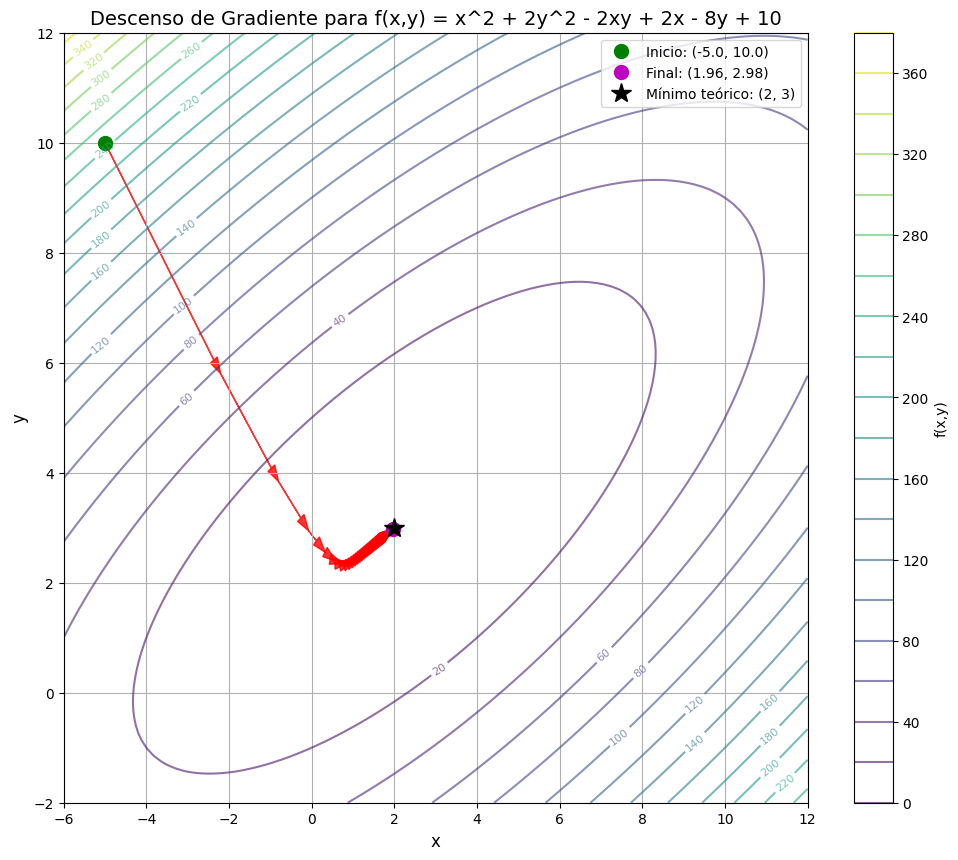

Error euclidiano: 0.042779


In [ ]:
# Preparamos los datos para el gráfico de contorno
x_range = np.linspace(-6, 12, 100)
y_range = np.linspace(-2, 12, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

# Calculamos el valor de la función para cada punto de la malla
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f([X[i, j], Y[i, j]])

# Creamos el gráfico de contorno
plt.figure(figsize=(12, 10))

# Dibujamos las curvas de nivel
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

# --- INICIO DE LA MODIFICACIÓN: DIBUJAMOS LA TRAYECTORIA CON FLECHAS ---

# En lugar de una línea, iteramos para dibujar cada paso como una flecha
for i in range(len(trayectoria) - 1):
    # Punto de inicio de la flecha
    start_point = trayectoria[i]
    # Punto final de la flecha
    end_point = trayectoria[i+1]

    # Coordenadas de inicio
    x_start, y_start = start_point[0], start_point[1]

    # Vector de dirección (cambio en x e y)
    dx = end_point[0] - x_start
    dy = end_point[1] - y_start

    plt.arrow(x_start, y_start, dx, dy,
              head_width=0.2,       # Ancho de la cabeza de la flecha
              head_length=0.3,      # Largo de la cabeza de la flecha
              fc='red',             # Color de relleno
              ec='red',             # Color del borde
              length_includes_head=True, # Asegura que la flecha termine en el punto final
              alpha=0.8,            # Transparencia
              linewidth=1)

# --- FIN DE LA MODIFICACIÓN ---

# --- CÓDIGO DE FINALIZACIÓN DEL GRÁFICO Y VERIFICACIÓN ---
# Marcamos el punto de inicio
plt.plot(punto_inicial[0], punto_inicial[1], 'go', markersize=10, label=f'Inicio: ({punto_inicial[0]}, {punto_inicial[1]})')

# Marcamos el punto final
# Nota: Usamos trayectoria[-1][0] para acceder a la coordenada X del último punto
plt.plot(trayectoria[-1][0], trayectoria[-1][1], 'mo', markersize=10,
         label=f'Final: ({trayectoria[-1][0]:.2f}, {trayectoria[-1][1]:.2f})')

# Marcamos el mínimo teórico
plt.plot(2, 3, 'k*', markersize=15, label='Mínimo teórico: (2, 3)')

# Configuramos el gráfico
plt.title('Descenso de Gradiente para f(x,y) = x^2 + 2y^2 - 2xy + 2x - 8y + 10', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)
plt.legend()
plt.colorbar(label='f(x,y)') # Muestra la escala de colores a la derecha

plt.show()

# Verificamos la convergencia
# Calculamos la distancia (norma) entre el último punto alcanzado y el objetivo (2, 3)
error = np.linalg.norm(trayectoria[-1] - np.array([2.0, 3.0]))

print(f"Error euclidiano: {error:.6f}")


c) Pregunta: ¿El algoritmo converge visualmente hacia el mínimo teórico?

- Sí, el algoritmo convergió correctamente al mínimo, ya que el error euclidiano es bajo (menor que 0.1).
- Empezamos en el puntito verde, y avanzamos siguiendo la trayectoria de las flechas hacia la estrella negra (el mínimo en 2,3), dando pasos cada vez más cortos a medida que se acerca (porque el gradiente se hace más pequeño).

### 1.4. Análisis Comparativo del Algoritmo

a) Tasa de Aprendizaje Alta `(alpha = 0.3)`

In [ ]:
# Repetimos el proceso, pero para una tasa de aprendizaje de 0.3
trayectoria_alta = descenso_gradiente(punto_inicial, alpha=0.3, n_iteraciones = 50)

Iteración 10: x = 1.8381, y = 2.9416, f(x,y) = 0.0141
Iteración 20: x = 1.9893, y = 2.9936, f(x,y) = 0.0001
Iteración 30: x = 1.9992, y = 2.9995, f(x,y) = 0.0000
Iteración 40: x = 1.9999, y = 3.0000, f(x,y) = 0.0000
Iteración 50: x = 2.0000, y = 3.0000, f(x,y) = 0.0000


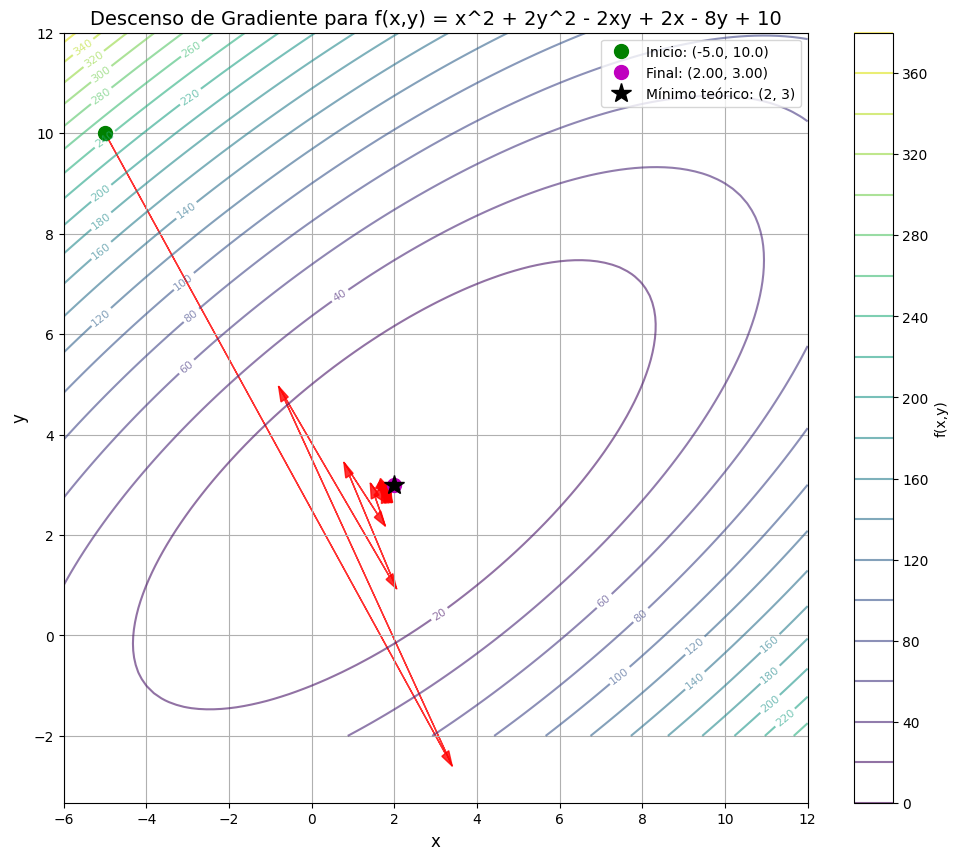

Error euclidiano: 0.000005


In [ ]:
# Preparamos los datos para el gráfico de contorno
x_range = np.linspace(-6, 12, 100)
y_range = np.linspace(-2, 12, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

# Calculamos el valor de la función para cada punto de la malla
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f([X[i, j], Y[i, j]])

# Creamos el gráfico de contorno
plt.figure(figsize=(12, 10))

# Dibujamos las curvas de nivel
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

# --- INICIO DE LA MODIFICACIÓN: DIBUJAR LA TRAYECTORIA CON FLECHAS ---

# En lugar de una línea, iteramos para dibujar cada paso como una flecha
for i in range(len(trayectoria_alta) - 1):
    # Punto de inicio de la flecha
    start_point = trayectoria_alta[i]
    # Punto final de la flecha
    end_point = trayectoria_alta[i+1]

    # Coordenadas de inicio
    x_start, y_start = start_point[0], start_point[1]

    # Vector de dirección (cambio en x e y)
    dx = end_point[0] - x_start
    dy = end_point[1] - y_start

    plt.arrow(x_start, y_start, dx, dy,
              head_width=0.2,       # Ancho de la cabeza de la flecha
              head_length=0.3,      # Largo de la cabeza de la flecha
              fc='red',             # Color de relleno
              ec='red',             # Color del borde
              length_includes_head=True, # Asegura que la flecha termine en el punto final
              alpha=0.8,            # Transparencia
              linewidth=1)

# --- FIN DE LA MODIFICACIÓN ---

# --- CÓDIGO DE FINALIZACIÓN DEL GRÁFICO Y VERIFICACIÓN ---
# Marcamos el punto de inicio
plt.plot(punto_inicial[0], punto_inicial[1], 'go', markersize=10, label=f'Inicio: ({punto_inicial[0]}, {punto_inicial[1]})')

# Marcamos el punto final
# Nota: Usamos trayectoria_alta[-1][0] para acceder a la coordenada X del último punto
plt.plot(trayectoria_alta[-1][0], trayectoria_alta[-1][1], 'mo', markersize=10,
         label=f'Final: ({trayectoria_alta[-1][0]:.2f}, {trayectoria_alta[-1][1]:.2f})')

# Marcamos el mínimo teórico
plt.plot(2, 3, 'k*', markersize=15, label='Mínimo teórico: (2, 3)')

# Configuramos el gráfico
plt.title('Descenso de Gradiente para f(x,y) = x^2 + 2y^2 - 2xy + 2x - 8y + 10', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)
plt.legend()
plt.colorbar(label='f(x,y)') # Muestra la escala de colores a la derecha

plt.show()

# Verificamos la convergencia
# Calculamos la distancia (norma) entre el último punto alcanzado y el objetivo (2, 3)
error = np.linalg.norm(trayectoria_alta[-1] - np.array([2.0, 3.0]))

print(f"Error euclidiano: {error:.6f}")

- **¿Qué comportamiento observa en la trayectoria?:** Observamos un comportamiento de oscilación, donde la trayectoria salta de un lado a otro del "valle" de la función, convergiendo rápidamente al mínimo $(2,3)$.
- **¿Por qué ocurre?** Porque el paso $\alpha$ es tan grande que el algoritmo "se pasa de largo" del mínimo en cada iteración, rebotando (o dando pasos agigantados) en las paredes de la función en lugar de descender suavemente.

b) Tasa de Aprendizaje Baja `(alpha = 0.01)`

In [ ]:
trayectoria_baja = descenso_gradiente(punto_inicial, alpha = 0.01, n_iteraciones=50)

Iteración 10: x = -2.7502, y = 6.6790, f(x,y) = 84.5866
Iteración 20: x = -1.3873, y = 4.7697, f(x,y) = 29.7270
Iteración 30: x = -0.5461, y = 3.6826, f(x,y) = 10.8907
Iteración 40: x = -0.0129, y = 3.0736, f(x,y) = 4.3591
Iteración 50: x = 0.3373, y = 2.7419, f(x,y) = 2.0397


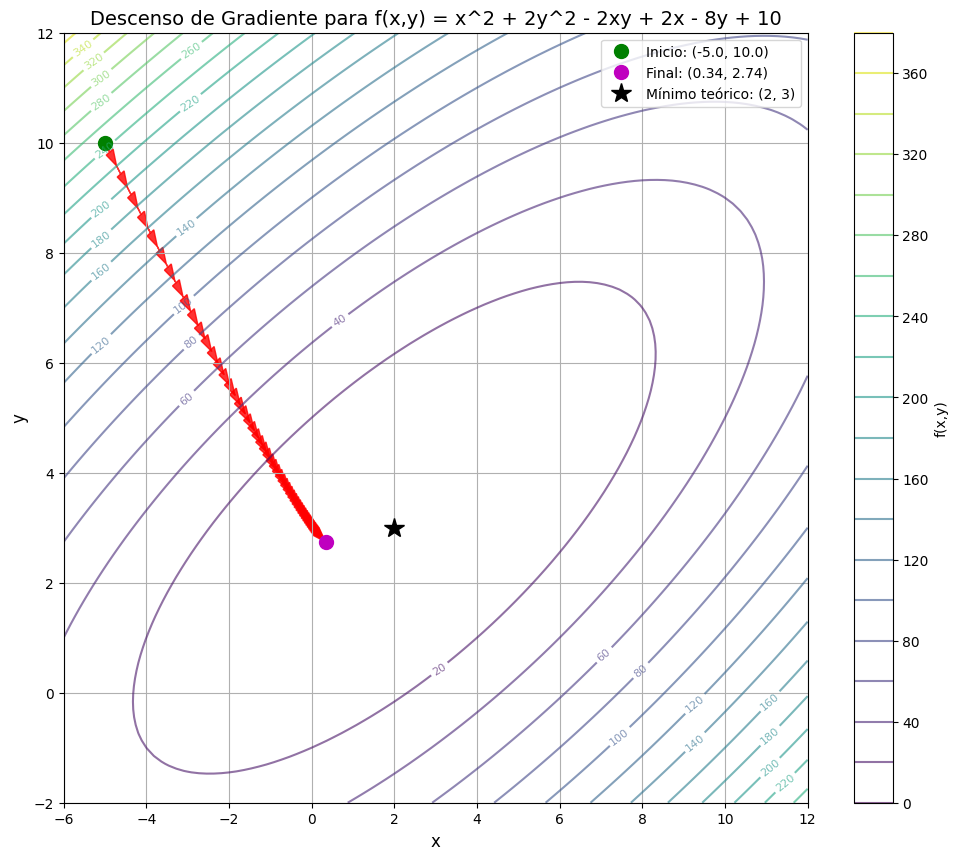

Error euclidiano: 1.682632


In [ ]:
# Preparamos los datos para el gráfico de contorno
x_range = np.linspace(-6, 12, 100)
y_range = np.linspace(-2, 12, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

# Calculamos el valor de la función para cada punto de la malla
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f([X[i, j], Y[i, j]])

# Creamos el gráfico de contorno
plt.figure(figsize=(12, 10))

# Dibujamos las curvas de nivel
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

# --- INICIO DE LA MODIFICACIÓN: DIBUJAR LA TRAYECTORIA CON FLECHAS ---

# En lugar de una línea, iteramos para dibujar cada paso como una flecha
for i in range(len(trayectoria_baja) - 1):
    # Punto de inicio de la flecha
    start_point = trayectoria_baja[i]
    # Punto final de la flecha
    end_point = trayectoria_baja[i+1]

    # Coordenadas de inicio
    x_start, y_start = start_point[0], start_point[1]

    # Vector de dirección (cambio en x e y)
    dx = end_point[0] - x_start
    dy = end_point[1] - y_start

    plt.arrow(x_start, y_start, dx, dy,
              head_width=0.2,       # Ancho de la cabeza de la flecha
              head_length=0.3,      # Largo de la cabeza de la flecha
              fc='red',             # Color de relleno
              ec='red',             # Color del borde
              length_includes_head=True, # Asegura que la flecha termine en el punto final
              alpha=0.8,            # Transparencia
              linewidth=1)

# --- FIN DE LA MODIFICACIÓN ---

# --- CÓDIGO DE FINALIZACIÓN DEL GRÁFICO Y VERIFICACIÓN ---
# Marcamos el punto de inicio
plt.plot(punto_inicial[0], punto_inicial[1], 'go', markersize=10, label=f'Inicio: ({punto_inicial[0]}, {punto_inicial[1]})')

# Marcamos el punto final
# Nota: Usamos trayectoria_alta[-1][0] para acceder a la coordenada X del último punto
plt.plot(trayectoria_baja[-1][0], trayectoria_baja[-1][1], 'mo', markersize=10,
         label=f'Final: ({trayectoria_baja[-1][0]:.2f}, {trayectoria_baja[-1][1]:.2f})')

# Marcamos el mínimo teórico
plt.plot(2, 3, 'k*', markersize=15, label='Mínimo teórico: (2, 3)')

# Configuramos el gráfico
plt.title('Descenso de Gradiente para f(x,y) = x^2 + 2y^2 - 2xy + 2x - 8y + 10', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)
plt.legend()
plt.colorbar(label='f(x,y)') # Muestra la escala de colores a la derecha

plt.show()

# Verificamos la convergencia
# Calculamos la distancia (norma) entre el último punto alcanzado y el objetivo (2, 3)
error = np.linalg.norm(trayectoria_baja[-1] - np.array([2.0, 3.0]))

print(f"Error euclidiano: {error:.6f}")

- **Comparación con el caso base:** La distancia recorrida es mucho menor respecto al caso base. En 50 iteraciones, el punto verde  bajó en dirección hacia el mínimo, pero todavía está muy lejos de aquel $(2,3)$.

- **¿Cuál es la desventaja de usar una tasa de aprendizaje tan baja?:** La convergencia es extremadamente lenta. Y se necesitarían miles de iteraciones para llegar al mismo resultado que con $\alpha=0.1$, lo cual es computacionalmente ineficiente.

## **Ejercicio 2: Boston Housing - Selección de Modela y Estabilidad**
En este ejercicio final, trabajaremos con un subconjunto del dataset ***Boston Housing***.
El objetivo es modelar la relación no lineal entre el porcentaje de población de bajo estatus (```lstat```) y el valor mediano de la vivienda (```medv```).

A diferencia del ejercicio anterior, aquí no solo buscaremos el mejor modelo, sino que pondremos a prueba la confiabilidad de nuestros métodos de validación.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import warnings

# Configuraciones básicas
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid') # Estilo limpio para gráficos

### **2.1 Selección del Grado del Polinomio**

In [4]:
# 1. Cargamos los datos desde la URL indicada en el PDF
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url)

# 2. Limpieza
boston_clean = boston.dropna(subset=['medv'])

In [ ]:
# Verificamos que cargo bien la base
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **1. Configuración inicial**
* Fije una semilla aleatoria (random.state=1)para asegurar
reproducibilidad en este primer paso.

In [ ]:
# 1. Definición de variables
X = boston_clean[['lstat']]
y = boston_clean['medv']
print(f"Datos Boston cargados correctamente. Observaciones: {X.shape[0]}")

Datos Boston cargados correctamente. Observaciones: 506


In [ ]:
# 2. Definimos los grados y las listas de errores
degrees = range(1, 11)
val_errors = []
loocv_errors = []
kfold_errors = []

#### **2. Cálculo de Errores**
 Para cada grado polinómico del 1 al 10, calcule el MSE
estimado utilizando:

* Método A: Enfoque del Conjunto de Validación (división 50% entrenamiento
/ 50% prueba).
* Método B: Validación Cruzada Dejando Uno Fuera (LOOCV).
* Método C: Validación Cruzada en K-Grupos (10-Fold CV).

#### **3. Visualización**
 Genere un único gráfico que superponga las tres curvas de error
(MSE vs Grado).

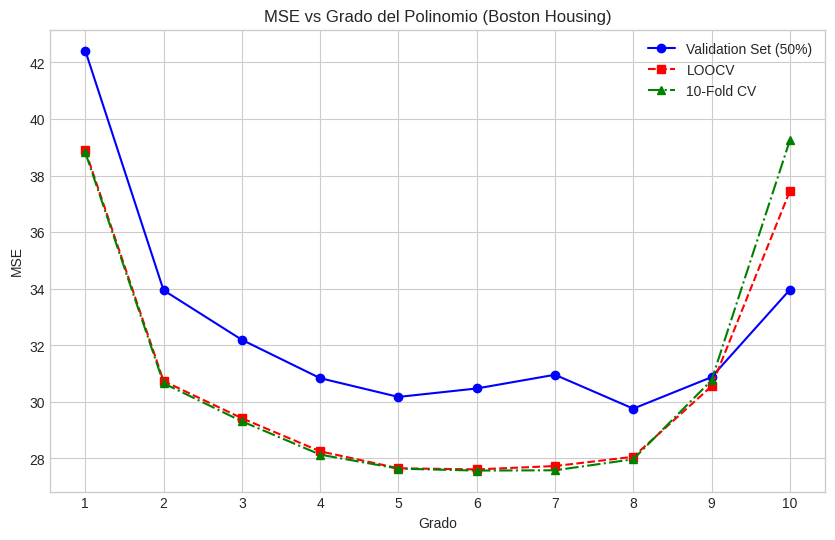

In [ ]:
# --- MÉTODOS:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=1)

for d in degrees:
    # Creamos el modelo usando Pipeline
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())

    # 1. Validación Simple
    model.fit(X_train, y_train)
    pred_val = model.predict(X_val)
    val_errors.append(mean_squared_error(y_val, pred_val))

    # 2. LOOCV (Leave-One-Out)
    loo = LeaveOneOut()
    # scoring='neg_mean_squared_error' devuelve negativo
    scores_loo = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error')
    loocv_errors.append(-scores_loo.mean())

    # 3. 10-Fold CV
    # Usamos random_state=1
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    scores_kfold = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    kfold_errors.append(-scores_kfold.mean())

# --- GRAFICAR  ---
plt.figure(figsize=(10, 6))
plt.plot(degrees, val_errors, 'b-o', label='Validation Set (50%)')
plt.plot(degrees, loocv_errors, 'r--s', label='LOOCV')
plt.plot(degrees, kfold_errors, 'g-.^', label='10-Fold CV')

plt.title('MSE vs Grado del Polinomio (Boston Housing)')
plt.xlabel('Grado')
plt.ylabel('MSE')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()


####**4. Decisión**
Basado en el gráfico (específicamente en las curvas de LOOCV y 10-Fold):
* **¿Cuál parece ser el grado óptimo del polinomio?**
  
  Según el gráfico, el grado óptimo se encuentra en el grado 6 de la curva 10-Fold. Esto debido a que es el punto que alcanza el error de validación mínimo, lo que indica que un polinomio de grado 6 ofrecce el mejor equilibrio para la generalización del modelo, minimizando el riesgo de overlifting que se presentaría en grados superiores.

Al observar el gráfico generado:
* **¿Coinciden los tres métodos en el grado óptimo? ¿Alguna curva parece más "errática" que las otras?**

  No, los tres métodos no coinciden en el grado óptimo. Mientras que **LOOCV** sugiere el grado 5 y **10-Fold** indica el grado 6, el método de **Validación (50/50)** difiere significativamente indicando el grado 8.
  
  Respecto a la estabilidad, la curva de Validación (50/50) es visiblemente la más errática. Esto es debido a que tiene una mayor varianza debido a que la estimación del error depende de una única partición aleatoria entre entrenamiento y validación. Al no realizar múltiples iteraciones para promediar resultados, la métrica de desempeño se vuelve altamente sensible a qué observaciones específicas fueron asignadas a cada grupo.


###**2.2. Análisis de Estabilidad**

**Pregunta 1. Podría explicar por qué LOOCV
daría siempre el mismo resultado independientemente de la semilla?**

* LOOCV produce siempre el mismo resultado independientemente de la semilla porque no depende de una partición aleatoria. Por lo tanto, no introduce variabilidad estocástica, a diferencia de ambos métodos vistos.

In [9]:
# Variables
X = boston_clean[['lstat']]   # DataFrame
y = boston_clean['medv']

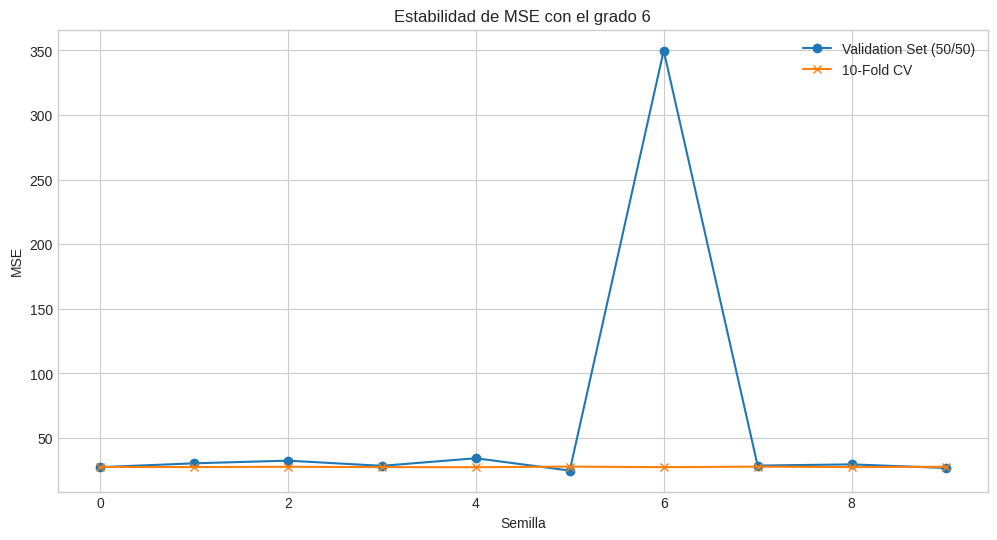

In [10]:
# Grado óptimo: 6
best_degree = 6

# Modelo polinomial

model = make_pipeline(
    PolynomialFeatures(degree=best_degree, include_bias=False),
    LinearRegression()
)

# Simulación
seeds = range(10)
mse_valset = []
mse_kfold = []

for n in seeds:
    # 1. Conjunto de validación (50/50)
    # Dividimos los datos: 50% entrenamiento, 50% validación con semilla cambiante)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=n
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_valset.append(mean_squared_error(y_test, y_pred))

    # 2. Validación cruzada en K-grupos
    kf = KFold(n_splits=10, shuffle=True, random_state=n)
    scores = cross_val_score(
        model, X, y,
        cv=kf,
        scoring="neg_mean_squared_error"
    )
    mse_kfold.append(-scores.mean())

mse_valset = np.array(mse_valset)
mse_kfold = np.array(mse_kfold)


# Graficamos  ambos métodos
plt.figure(figsize=(12, 6))
plt.plot(list(seeds), mse_valset, marker="o", label="Validation Set (50/50)")
plt.plot(list(seeds), mse_kfold, marker="x", label="10-Fold CV")
plt.xlabel("Semilla")
plt.ylabel("MSE")
plt.title(f"Estabilidad de MSE con el grado 6")
plt.grid(True)
plt.legend()
plt.show()

**Pregunta 2. Al observar la simulación y los resultados estadísticos: ¿Qué método mostró mayor variabilidad (mayor desviación estándar) al cambiar la semilla? ¿Por qué esta variabilidad podría ser problemática?**
* El Conjunto de Validación (50/50) presenta una mayor desviación estándar, lo que indica mayor variabilidad del error frente a cambios en la semilla.

* Esta alta variabilidad es problemática porque implica que la evaluación del modelo depende fuertemente de una única partición aleatoria, lo que puede llevar a conclusiones inestables o poco confiables. En contraste, el 10-Fold CV reduce la varianza del estimador del error al promediar múltiples particiones, proporcionando una estimación más robusta de la capacidad de generalización del modelo.